# Analysis of Jumia Laptop Products

### by Abdulbasit Ayinla

## 1. Introduction

This project analyzes the variety of laptops available for sale on the Jumia shopping web application. Jumia is a leading Nigerian online marketplace dealing in the trade of a vast number of products from household appliances to mobile gadgets to clothing items. Laptop data was scraped from Jumia webpages using Microsoft power automate desktop. All laptop data displayed on the catalogue was collected which amounts to 2400 records. 
This project uses python libraries such as:

* Pandas
* Numpy
* Matplotlib
* Seaborn
* REGEX

## Table of Contents

1. [Introduction](#1.-Introduction)
<br>

2. [Data Import](#2.-Data-Import)
<br>

3. [Data Assessment](#3.-Data-Assessment)
<br>

4. [Data Cleaning](#4.-Data-Cleaning)
<br>

5. [Data Preprocessing/ Feature Extraction](#5.-Data-Preprocessing/-Feature-extraction)
<br>

6. [Explanatory Analysis/ Data Visualization](#6.-Explanatory-Analysis/-Data-Visualization)
<br>

## 2. Data Import

In [1]:
# importing required libraries
import pandas as pd #for data cleaning/dataframe manipulation
import numpy as np #for numeric data manipulation 
import matplotlib.pyplot as plt #for plotting and visualization
import seaborn as sns #for complex visualization
import re #for strings processing

%matplotlib inline

In [2]:
# importing data using pandas read_excel method
df = pd.read_excel(r'C:\Users\hp\Desktop\Jumia.xlsx')

## 3. Data Assessment

#### * Assessing the dataframe for quality and tidiness issue, and understanding the data

In [3]:
df.head()

,name,price,rating
0,Hp Pavilion 15 AMD RYZEN 3 -Keyboard Light- 2....,"₦ 224,800",4.5 out of 5(30)
1,Lenovo AMD RYZEN 1TB HDD 8GB RAM Win 10+ 32GB ...,"₦ 186,400",4.4 out of 5(47)
2,"Hp 15 Intel Celeron N4020 8GB RAM, 1TB HDD, Wi...","₦ 183,000",5 out of 5(9)
3,Hp 15 Intel Celeron N4020 8GB RAM 1TB HDD Wind...,"₦ 176,100",4.6 out of 5(18)
4,Hp Pavilion 15 AMD RYZEN 3 -Keyboard Light- 2....,"₦ 234,100",4.4 out of 5(7)


In [4]:
df.tail()

,name,price,rating
2394,Hp Pavilion 15- AMD RYZEN 3 -8GB RAM/1TB HDD 2...,"₦ 225,900",NaN
2395,Hp Pavilion 15- AMD RYZEN 3-Keyboard Light -12...,"₦ 250,000",NaN
2396,"Hp 15 11TH GEN, INTEL CORE I5, 12GB RAM, 256GB...","₦ 450,500",NaN
2397,Hp Stream 14 Laptop Intel Celeron - 64GB HDD- ...,"₦ 129,000",NaN
2398,Hp 15 Intel Pentium Quad Core 8GB RAM - Finger...,"₦ 242,600",4.8 out of 5(8)


In [5]:
df.dtypes

name      object
price     object
rating    object
dtype: object

In [6]:
df.shape

(2399, 3)

In [7]:
df.isna().sum()

name         0
price        2
rating    1925
dtype: int64

In [8]:
df.duplicated().sum()

616

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2399 non-null   object
 1   price   2397 non-null   object
 2   rating  474 non-null    object
dtypes: object(3)
memory usage: 56.4+ KB


In [10]:
df.sample(5)

,name,price,rating
1659,"Hp ProBook 450 G8 15.6"" IPS FHD Business PC (...","₦ 539,900",NaN
887,Asus 210m Intel Celeron 128GB EMMC 4GB RAM 11....,"₦ 142,500",NaN
336,Hp Stream 11 Intel Celeron 2GB RAM- 32GB HDD W...,"₦ 93,000",NaN
1880,English Silicone Keyboard Cover Protector For ...,Shipped from abroad,"₦ 2,31829%"
58,Hp ProBook X360 11 G1 Touchscreen- Intel Penti...,"₦ 157,000",5 out of 5(1)


#### Data quality and tidiness issues observed are:
                                         
* erroneous datatypes
* duplicate entries
* irrelevant data (laptop accessories present in dataframe are irrelevant to the course of this analysis)
* rating column should be split

## 4. Data Cleaning

#### * Cleaning observed issues

In [11]:
jumia = df.copy() #making a copy of the dataframe

i. removing duplicates

In [12]:
jumia.drop_duplicates(inplace=True) #removing redundant data

In [13]:
jumia.duplicated().sum()

0

In [14]:
jumia.shape

(1783, 3)

ii. converting price column to integer

In [15]:
jumia['price'] = jumia['price'].str[1:] #indexing out the naira symbol
jumia['price'] = jumia['price'].str.replace(',', '') #removing the commas as it's an hindrance for conversion

In [16]:
jumia.dropna(subset=['price'], inplace=True)

In [17]:
jumia['price'] = jumia['price'].astype(int)
jumia['price'].dtype

dtype('int32')

In [18]:
jumia.sample(5)

,name,price,rating
2034,"Lenovo Intel Celeron, 64GB, 4GB, Wins 10 11.6...",126900,NaN
1905,FOLDABLE LAPTOP DESK - Blue,10800,NaN
1334,Hp Envy 13-BA1047 Core™ I5-1135G7 256GB SSD 8G...,541775,NaN
935,"Acer TRAVELMATE P2 11th Gen, INTEL CORE I7 8GB...",484900,NaN
6,Hp Pavilion 15- Intel Core I5- 16GB RAM- Keybo...,458200,4.8 out of 5(8)


In [19]:
jumia.shape

(1645, 3)

iii. removing irrelevant data

In [20]:
jumia[jumia.price<=20000] #indexing rows where the price is less than 20k to spot assessories

,name,price,rating
50,"Multifunctional Laptop Foldable Table,Bed Side...",10980,NaN
68,"Anti Blue Rays, Radiation Computer And Phone G...",3799,NaN
179,"Multifunctional Laptop Foldable Table,Bed Side...",8999,NaN
201,Portable 7~15.4 Inch Laptop Stand Also For Tab...,7995,3 out of 5(3)
264,Laptop Skin (13 - 17inches Fit),4500,5 out of 5(1)
...,...,...,...
987,Silicone Remote Control Cover For Chromecast W...,6180,NaN
1027,RCA To HDMI Converter Cvbs AV Composite Video ...,11394,NaN
1078,Micro-USB 1A Li-Ion 18650 Lithium Battery Char...,556,NaN
1117,USB Camera 720p Easy Use High Resolution Many ...,10445,NaN


In [21]:
jumia = jumia[~(jumia['price'] < 20000)]

In [22]:
jumia[jumia.price<75000] #further assessments to spot products priced lower that are not laptops

,name,price,rating
279,Biometric Fingerprint Scanner,24500,NaN
371,Adjustable Computer & Laptop/ Reading Desk Wit...,36000,3.5 out of 5(2)
449,WHITE THREE FEET TV STAND,33999,NaN
555,Rotational Adjustable Notebook Computer Stand,23500,NaN
655,Adjustable Computer & Laptop/ Reading Desk Wit...,21900,5 out of 5(1)
781,Smart Drone Toy From14yrs Professional Camera ...,37999,NaN
898,Super Scanner UareU 4500 Biometric Fingerprint...,29000,NaN
1089,Wood 4 Fit Television Stand Shelve/ TV Stand F...,37999,5 out of 5(2)
1174,Zenith Counting Machine,69999,NaN
1209,Adjustable Folding Laptop Stand Desk,26789,5 out of 5(1)


In [23]:
jumia = jumia[~(jumia['price'] < 75000)]

In [24]:
jumia[jumia.price<=100000]

,name,price,rating
7,Hp Stream 11 Intel Celeron D/C 4GB RAM- 64GB ...,95600,3.4 out of 5(8)
17,Hp Stream 11-Intel Celeron 64gb Ssd/4gb Ram+ 3...,100000,NaN
21,"Hp Stream11Intel Celeron 32gb Mmc,2gbRamOnBoar...",95000,NaN
23,Hp Stream 11 Intel Celeron 2GB RAM- 32GB HDD W...,95000,NaN
29,Hp Stream 11 Intel Celeron 2GB RAM- 32GB HDD W...,93400,NaN
32,"Hp CHROMEBOOK11, CELERON, 4GB RAM,16GB SSD + 3...",82000,NaN
78,"Hp CHROMEBOOK11, CELERON, 4GB RAM,32GB SSD + 3...",80000,NaN
90,"Hp CHROMEBOOK 11 G4, INTEL CELERON, 4GB RAM,16...",80000,NaN
91,Hp Stream 11 Intel Celeron D/C 4GB RAM- 64GB ...,98000,NaN
101,"Hp Stream11Intel Celeron32gb Mmc,2gb RAM Windo...",95000,3.7 out of 5(3)


In [25]:
jumia.shape

(1519, 3)

In [26]:
jumia.sample(10)

,name,price,rating
49,Hp Pavilion 15- AMD RYZEN 3 -16GB RAM/256GB SS...,247900,NaN
2054,"Hp EliteBook X360 830 G7:10th Gen I5,512GB SSD...",704000,NaN
1558,Hp Spectre 16 X360 Core I7 16GB RAM 512SSD NVI...,1320000,NaN
1095,"Hp CHROMEBOOK 11 G4,Intel Celeron,4gb RAM,32gb...",82000,NaN
439,Lenovo V15-IGL Intel Celeron 1TB HDD 4GB RAM W...,150000,NaN
113,Hp 15 Intel Celeron N4020 8GB RAM 1TB HDD Wind...,188500,4.5 out of 5(2)
479,Hp Notebook Laptop 14 10th Gen Intel Core I3 1...,260000,NaN
1168,Hp 14-DQ0003 Celeron Dual-Core 64GB EMMC 4GB R...,205000,NaN
1737,"Hp 255 G7 Notebook, (1L3Z9EA), AMD Ryzen 3, 1T...",260000,NaN
1722,Hp Notebook 15 Touchscreen PC- Intel® CoreTM I...,298000,4 out of 5(1)


iv. splitting rating column to rating and no of ratings

In [27]:
j = jumia['rating'].str.split('(', expand=True)
jumia = pd.merge(jumia, j, on=jumia.index)

In [28]:
jumia.drop(columns=['key_0', 'rating'], inplace=True)
jumia.rename(columns={0:'rating', 1:'no_of_rating'}, inplace=True)

In [29]:
jumia['rating'] = jumia['rating'].str[:-9] #to delete the 'out of 5' description
jumia['no_of_rating'] = jumia['no_of_rating'].str[:-1] #to remove the closing bracket

In [30]:
jumia['rating'] = jumia['rating'].replace(np.nan, 0)
jumia['no_of_rating'] = jumia['no_of_rating'].replace(np.nan, 0)

In [31]:
jumia['rating'] = jumia['rating'].astype(float)
jumia['no_of_rating'] = jumia['no_of_rating'].astype(int)

In [32]:
jumia = jumia.reset_index(drop=True)
jumia

,name,price,rating,no_of_rating
0,Hp Pavilion 15 AMD RYZEN 3 -Keyboard Light- 2....,224800,4.5,30
1,Lenovo AMD RYZEN 1TB HDD 8GB RAM Win 10+ 32GB ...,186400,4.4,47
2,"Hp 15 Intel Celeron N4020 8GB RAM, 1TB HDD, Wi...",183000,5.0,9
3,Hp 15 Intel Celeron N4020 8GB RAM 1TB HDD Wind...,176100,4.6,18
4,Hp Pavilion 15 AMD RYZEN 3 -Keyboard Light- 2....,234100,4.4,7
...,...,...,...,...
1514,"GPD MicroPC Mini Laptop, 6.0 Inch, 8GB+256GB, ...",551699,0.0,0
1515,"Apple MacBook Air - 13.6"" - 8GB - 512GB - M2 -...",2999999,0.0,0
1516,10.1inch Netbook Lightweight Portable Laptop A...,517408,0.0,0
1517,NEW 10.1'' Tablet N PC Android 6.0 Octa Core 6...,91631,0.0,0


## 5. Data Preprocessing/ Feature Extraction

#### * Defining various functions to extract laptop specification

In [33]:
from nltk.tokenize import word_tokenize #to create word tokens

In [34]:
#defining function to extract laptop name
laptop_brands = ['hp', 'lenovo', 'dell', 'acer', 'asus', 'ipason', 'msi', 'itel', 'microsoft', 'toshiba', 'apple', 'acara', 'arctic hunter', 'bange', 'baseki', 'belkin', 'caterpillar', 'coolbell', 'coosybo', 'eekoo', 'elecom', 'fashion', 'firman', 'gateway', 'generic', 'havit', 'haweel', 'high power', 'hisar', 'hppower', 'huawei', 'ikea', 'jansport', 'jumpstart', 'kingston', 'kingston technology', 'learning', 'lelook', 'logitech', 'lokass', 'minisforum', 'miratec', 'motospeed', 'netac', 'noctua', 'power plus', 'nzxt', 'promate', 'ravpower', 'razer', 'remax', 'rev', 'samsung', 'samdi', 'sandisk', 'seagate', 'silver stone', 'shplus', 'solar africa', 'sony', 'vtech', 'wood', 'yoobao', 'zealot']

def getbrand(name):
    name = name.lower() #converting name to lowercase
    word_tokens = word_tokenize(name) #splits each word in name
    brand = [char for char in word_tokens if char in laptop_brands]
    return ''.join(brand)

In [35]:
jumia['brand'] = jumia['name'].apply(getbrand)

In [36]:
jumia['brand'].replace('lenovolenovo', 'lenovo', inplace=True)
jumia['brand'].replace('hphp', 'hp', inplace=True)
jumia['brand'].replace('hpasus', 'hp', inplace=True)
jumia['brand'].replace('msimsi', 'msi', inplace=True)
jumia['brand'].replace('hpmicrosoft', 'microsoft', inplace=True)
jumia['brand'].replace('toshibatoshiba', 'toshiba', inplace=True)

In [37]:
jumia.sample(10)

,name,price,rating,no_of_rating,brand
1442,"Hp 240 G7 CORE I3 8TH GEN 1TB 12GB 14"" NO DVD ...",259000,0.0,0,hp
130,Lenovo Ideapad Intel Celeron 8GB RAM 1TB HDD 1...,180500,0.0,0,lenovo
696,"Acer Spin 3 X360 Core I5,8gb,256 SSD,Backlit K...",390000,0.0,0,acer
144,Lenovo Ideapad 4GBRAM - 1TB HDD Intel Celeron...,165000,4.0,6,lenovo
49,Hp ProBook 11 X360- TOUCHSCREEN Intel CELERON ...,132000,4.7,3,hp
528,Hp 15 Intel Celeron N4020 8GB RAM 1TB HDD 15.6...,222500,0.0,0,hp
1393,"Hp Omen 15 Gaming,10th Gen Intel Core I7,16GB ...",1055700,0.0,0,hp
994,Hp ENVY X360 15 10th Gen Intel Core I5(512GB S...,545000,4.7,3,hp
1146,"Hp 255 G7 Notebook, (1L3Z9EA), AMD Ryzen 3, 1T...",260000,0.0,0,hp
563,"Hp Stream 11 Intel Celeron (4GB RAM,32GB SSD+ ...",125000,0.0,0,hp


In [38]:
#defining function to extract laptop operating system
operating_system = ['windows', 'mac', 'macos', 'macbook', 'fedora', 'ubuntu', 'linux', 'unix']

def os(name):
    name = name.lower()
    word_tokens = word_tokenize(name) #splits each word in name for parsing
    os = [char for char in word_tokens if char in operating_system]
    return ''.join(os)

In [39]:
jumia['operating_system'] = jumia['name'].apply(os)

In [40]:
jumia.sample(10)

,name,price,rating,no_of_rating,brand,operating_system
1089,Lenovo Ideapad Intel Celeron N4000 Series (4GB...,147900,0.0,0,lenovo,
865,Hp Pavilion 15-Intel Core-i5 512GB/12GB Touch/...,470600,4.8,4,hp,
1282,Hp Pavilion 15- AMD RYZEN 3-Keyboard Light -16...,260000,3.3,3,hp,windows
1140,DELL Latitude 3420 Laptop Core I5-1137G7 512GB...,499000,0.0,0,dell,
488,Asus Mini Laptop Intel Celeron 4GB RAM 128GB 1...,139800,0.0,0,asus,
1482,"DELL Vostro 14 Intel Core I3 1TB HDD,12GB RAM ...",288000,0.0,0,dell,windows
1249,"Hp Stream 14 Intel Celeron,64gb, 4gb, Windows ...",171200,0.0,0,hp,windows
18,Hp Stream 11 Intel Celeron D/C 4GB RAM- 64GB ...,101500,4.3,3,hp,
421,Hp Stream 14 Intel Celeron4 GB RAM 64GB SSD Wi...,129000,0.0,0,hp,windows
922,"Hp 15 Intel Celeron N4020 8GB 1TB HDD 15.6"" Wi...",221000,0.0,0,hp,


In [41]:
#defining function to extract laptop ram
def getram(name):
    name = name.lower()
    ram = re.findall(r'\d+[g][b]\s[r][a][m]', name)
    return ''.join(ram)

In [42]:
jumia['ram'] = jumia['name'].apply(getram)

In [43]:
jumia['ram'] = jumia['ram'].str[:-4] #to remove the 'ram' in the text

In [44]:
jumia.sample(10)

,name,price,rating,no_of_rating,brand,operating_system,ram
389,Hp 15 Intel Celeron N4020 4GB RAM 1TB HDD Wind...,182900,0.0,0,hp,windows,4gb
45,Hp Stream 11 Intel Celeron 4GB RAM- 64GB HDD W...,103000,4.1,7,hp,,4gb
170,Hp Notebook 15 Intel Core I3 - 8GB RAM 10TH GE...,255000,0.0,0,hp,windows,8gb
1418,"Gateway 11.6"" X360 Touchscreen 2-in-1s Laptop,...",160000,0.0,0,gateway,windows,4gb
936,Asus Mini Notebook Intel Celeron 4GB RAM 500GB...,130550,0.0,0,asus,,4gb
183,Hp Pavilion 15 Inch AMD RYZEN™ 3 - 2.6GHz - 3....,218000,0.0,0,hp,windows,4gb
822,Hp Stream 14 Intel Celeron 4GB RAM 64GB SSD Wi...,420000,5.0,1,hp,windows,4gb
1412,Hp 15 Inch AMD RYZEN™ 3 - 2.6GHz - 3.5GHz -AMD...,288000,0.0,0,hp,windows,12gb
1115,Hp Notebook 15 INTEL CELERON Touchscreen 4GB R...,220000,0.0,0,hp,windows,4gb
284,Hp Stream 11 Intel Celeron 2GB RAM- 32GB HDD W...,92500,0.0,0,hp,,2gb


In [45]:
processors = ['intel', 'core', 'pentium', 'celeron', 'amd', 'i5', 'i3', 'i7']

def getprocessor(name):
    name = name.lower()
    name = name.replace('-', ' ')
    name = name.replace(',', ' ')
    name = name.replace(':', ' ')
    name = name.replace('.', ' ')
    word_tokens = word_tokenize(name)
    processor = [char for char in word_tokens if char in processors]
    return ' '.join(processor)

In [46]:
jumia['processor'] = jumia['name'].apply(getprocessor)

In [47]:
jumia['processor'] = jumia['processor'].replace('amd amd', 'amd')
jumia['processor'] = jumia['processor'].replace('amd core amd', 'amd')
jumia['processor'] = jumia['processor'].replace('amd core', 'amd')
jumia['processor'] = jumia['processor'].replace('intel pentium core', 'intel pentium')
jumia['processor'] = jumia['processor'].replace('intel celeron core', 'intel celeron')
jumia['processor'] = jumia['processor'].replace('intel core i5 intel', 'intel core i5')
jumia['processor'] = jumia['processor'].replace('i3', 'intel core i3')
jumia['processor'] = jumia['processor'].replace('i5', 'intel core i5')
jumia['processor'] = jumia['processor'].replace('i7', 'intel core i7')
jumia['processor'] = jumia['processor'].replace('intel i3', 'intel core i3')
jumia['processor'] = jumia['processor'].replace('intel i5', 'intel core i5')
jumia['processor'] = jumia['processor'].replace('intel i7', 'intel core i7')
jumia['processor'] = jumia['processor'].replace('core i5', 'intel core i5')
jumia['processor'] = jumia['processor'].replace('core i7', 'intel core i7')
jumia['processor'] = jumia['processor'].replace('core i3', 'intel core i3')
jumia['processor'] = jumia['processor'].replace('celeron core', 'intel celeron')

In [48]:
jumia.sample(10)

,name,price,rating,no_of_rating,brand,operating_system,ram,processor
635,Hp Pavilion 15- AMD RYZEN 3-Keyboard Llight -1...,280000,4.3,4,hp,windows,16gb,amd
516,Hp 15- 11th Gen Backlit Keyboard Intel Core™ ...,305200,0.0,0,hp,,,intel core i3
1065,DELL Precision 3561 11th Gen Intel Core I5 512...,522500,0.0,0,dell,,16gb,intel core i5
80,Lenovo INTEL® CELERON® Lenovo Ideapad 4GB RAM ...,145000,0.0,0,lenovo,,4gb,
1318,Hp EliteBook X360 1030 G8 11th Gen Core I7 512...,1100000,0.0,0,hp,,16gb,intel core i7
1479,"Msi THIN GAMING Intel Core I7 512GB SSD,8GB RA...",850000,0.0,0,msi,,8gb,intel core i7
1336,Hp 250 G8 11th Gen Intel Core I7 (1TB HDD/8GB ...,505000,0.0,0,hp,,8gb,intel core i7 intel
253,Lenovo IDEAPAD V14 -10TH GEN - INTEL CORE I3 -...,232000,0.0,0,lenovo,windows,8gb,intel core i3
297,Hp ProBook 11 X360- 256GB SSD TOUCHSCREEN Inte...,142000,4.5,2,hp,,4gb,intel celeron
405,Hp ENVY 13 11TH GEN INTEL CORE I5 16GB RAM 512...,562000,0.0,0,hp,,16gb,intel core i5


In [49]:
def getgaming(name):
    name = name.lower()
    if 'gaming' in name:
        return 'gaming'

In [50]:
jumia['gaming'] = jumia['name'].apply(getgaming)

In [51]:
jumia[jumia.gaming=='gaming']

,name,price,rating,no_of_rating,brand,operating_system,ram,processor,gaming
100,Lenovo IdeaPad Gaming 3 AMD Ryzen 7 8GB RAM 1T...,521750,0.0,0,lenovo,,8gb,amd,gaming
111,DELL G5 5505 15.6 Gaming Laptop AMD 4th Gen Ry...,455000,0.0,0,dell,,8gb,amd,gaming
180,"Hp 16 VICTUS GAMING, INTEL CORE I5, 8GB RAM, 2...",585500,4.5,2,hp,,8gb,intel core i5,gaming
245,"Hp Omen 16 Gaming 11th Gen Intel Core I7,16GB ...",970000,0.0,0,hp,windows,,intel core i7,gaming
346,"Hp Omen 15 Gaming,10th Gen Intel Core I7,16GB ...",1053000,0.0,0,hp,,16gb,intel core i7,gaming
428,"Hp Omen 16 Gaming 11th Gen Intel Core I7,16GB ...",980000,0.0,0,hp,windows,,intel core i7,gaming
466,Acer Nitro 5 Gaming Laptop,530000,0.0,0,acer,,,,gaming
476,Hp VICTUS 16-D0023 GAMING Core I5 256GB SSD 8G...,565000,0.0,0,hp,,8gb,intel core i5,gaming
501,"Msi GF63 Thin Gaming Core I5-10500H, 512GB SSD...",600000,0.0,0,msi,,8gb,intel core i5,gaming
509,DELL Alienware M15 R5 Gaming Laptop 15.6 FHD A...,1450000,0.0,0,dell,,,amd,gaming


In [52]:
jumia.to_excel('jumia_processed.xlsx')

## 6. Explanatory Analysis/ Data Visualization

In [53]:
sns.set(color_codes=True)

### 1. What is the distribution of laptop price?

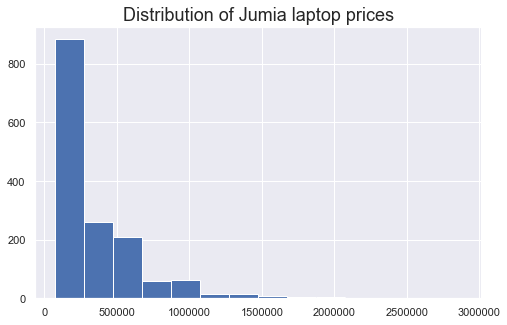

In [54]:
#plotting distribution graph of laptop prices
price = jumia['price']
plt.figure(figsize=(8,5))
plt.hist(price, bins=range(75000, 3000000, 200000))
plt.title('Distribution of Jumia laptop prices', fontsize=18)
plt.ticklabel_format(style='plain', axis="x")
plt.show()

#### Distribution chart of laptop price skew to the right, with most laptops priced at less than 500k

### 2. Which are the most expensive laptops?

In [55]:
most_expensive_laptops = jumia[['name', 'price']].sort_values('price', ascending=False).head(11)
most_expensive_laptops = most_expensive_laptops.reset_index(drop=True)
most_expensive_laptops

,name,price
0,"Apple MacBook Air - 13.6"" - 8GB - 512GB - M2 -...",2999999
1,"Asus ROG ZEPHYRUS G1, AMD RYZEN 9-5900H,2TB SS...",2030000
2,"Asus ROG ZEPHYRUS G1,AMD RYZEN 9-5900H,2TB SSD...",2030000
3,"Apple MacBook Pro - 16"" Touch Bar -2.4GHZ Core...",1999000
4,"Asus ROG ZEPHYRUS G1, AMD RYZEN 9-5900H,2TB SS...",1950000
5,DELL Alienware X15 R1 GAMING:Core™ I7-11800H 1...,1800000
6,DELL Alienware X15 R1 GAMING:Core™ I7-11800H 1...,1785000
7,DELL Alienware X15 R1 GAMING:Core™ I7-11800H 1...,1780000
8,DELL Alienware X15 R1 GAMING:Core™ I7-11800H 1...,1780000
9,"DELL XPS 15 9520 INTEL CORE I9-12900HK, 16GB R...",1700000


### 3. Which are the least expensive laptops?

In [56]:
least_expensive_laptops = jumia[['name', 'price']].sort_values('price', ascending=True).head(10)
least_expensive_laptops = least_expensive_laptops.reset_index(drop=True)
least_expensive_laptops

,name,price
0,"Hp CHROMEBOOK, INTEL CELERON, 4GB RAM,16GB EMM...",75000
1,"Hp 11 G3, INTEL CELERON, 4GB RAM,16GB SSD + 32...",79000
2,"Hp CHROMEBOOK, INTEL CELERON, 4GB RAM,16GB EMM...",79000
3,"Hp CHROMEBOOK11, CELERON, 4GB RAM,32GB SSD + 3...",80000
4,"Hp CHROMEBOOK 11 G4, INTEL CELERON, 4GB RAM,16...",80000
5,"Hp CHROMEBOOK 11 G4, CELERON, 4GB RAM,16GB SSD...",82000
6,"Hp CHROMEBOOK 11 G4,Intel Celeron,4gb RAM,32gb...",82000
7,"Hp CHROMEBOOK 11 G4,Celeron,4gb RAM,32gb SSD +...",82000
8,"Hp CHROMEBOOK INTEL CELERON ,4GB RAM,16GB WIN...",82000
9,"Hp CHROMEBOOK 11 G4,Intel Celeron,4gb RAM,32gb...",82000


#### The entire list of least expensive laptops are all Hp products. It could be concluded that Hp laptops are the cheapest laptops that could be gotten on Jumia

### 4. Which brands are the most available?

In [57]:
most_available_brand = jumia['brand'].value_counts()
most_available_brand.drop('', inplace=True)
most_available_brand

hp           1014
lenovo        231
dell          115
asus           92
itel           13
acer           12
apple           8
msi             7
microsoft       7
ipason          5
gateway         3
toshiba         1
Name: brand, dtype: int64

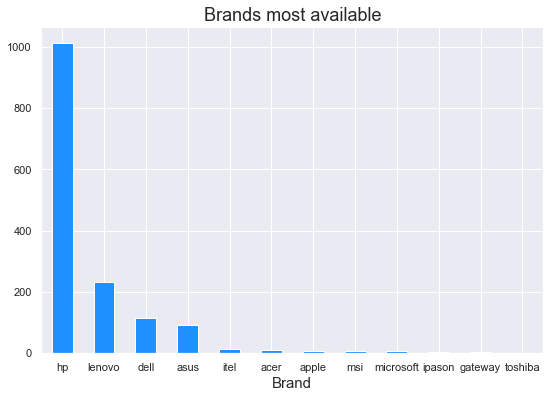

In [58]:
plt.figure(figsize = (9,6))
most_available_brand.plot.bar(color='dodgerblue')
plt.title('Brands most available', fontsize=18)
plt.xlabel('Brand', fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### HP laptops are by far the most available laptop brand on jumia catalogue

### 5. What is the average price by RAM size of a laptop?

In [59]:
avg_ram_price = jumia.groupby('ram')['price'].mean().to_frame()
avg_ram_price.sort_values('price', ascending=False, inplace=True)
avg_ram_price.drop('', inplace=True)
avg_ram_price

,price
ram,
40gb,1.915000e+06
32gb,1.235333e+06
16gb,5.387155e+05
8gb,3.598501e+05
12gb,3.113575e+05
4gb,1.616168e+05
2gb,1.002320e+05


<Figure size 864x576 with 0 Axes>

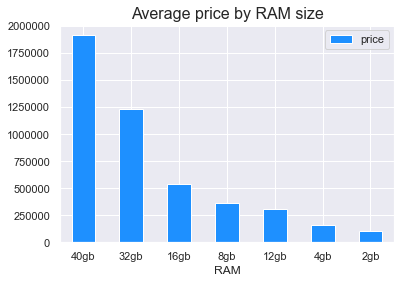

In [60]:
plt.figure(figsize = (12,8));
avg_ram_price.plot.bar(color='dodgerblue');
plt.title('Average price by RAM size', fontsize=16)
plt.xlabel('RAM', fontsize=12)
plt.xticks(rotation=0)
plt.ticklabel_format(style = 'plain', axis='y')
plt.show();

#### Prices rise by increase in RAM size, higher RAMs == higher prices

### 6. Which is the most common processor?

In [61]:
most_common_processor = jumia.processor.value_counts().head()
most_common_processor

intel celeron    420
intel core i3    268
intel core i5    238
amd              206
intel core i7    170
Name: processor, dtype: int64

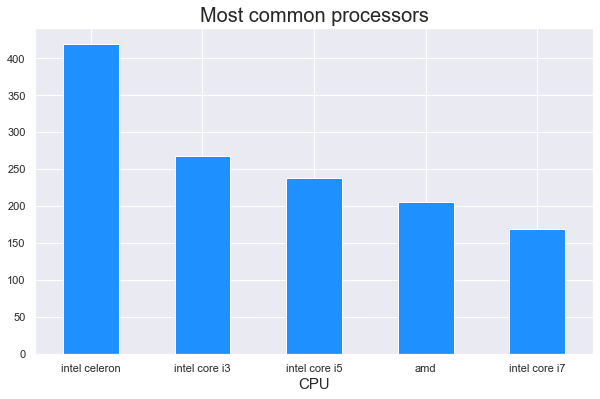

In [62]:
plt.figure(figsize = (10,6))
most_common_processor.plot.bar(color='dodgerblue')
plt.title('Most common processors', fontsize=20)
plt.xlabel('CPU', fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### Majority of laptop processors present on Jumia catalogue are Intel processors with varying types

### 7. What is the average price of each laptops brand?

In [63]:
avg_brand_price = jumia.groupby('brand')['price'].mean().to_frame()
avg_brand_price.sort_values('price', ascending=False, inplace=True)
avg_brand_price.drop('', inplace=True)
avg_brand_price

,price
brand,
apple,1.509218e+06
msi,8.747143e+05
microsoft,7.011429e+05
dell,6.112287e+05
acer,4.470083e+05
hp,3.390835e+05
lenovo,2.916189e+05
asus,2.715848e+05
ipason,2.652390e+05


<Figure size 720x432 with 0 Axes>

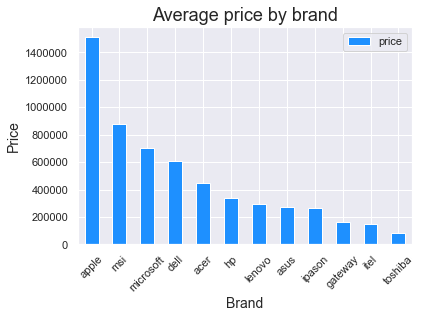

In [66]:
plt.figure(figsize = (10,6))
avg_brand_price.plot.bar(color='dodgerblue')
plt.title('Average price by brand', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

#### Apple laptops are the most priced Jumia laptops on average. This might not be fully reliable as they are only three records of Apple laptops in the dataframe, same with msi and microsoft. 

### 8. Which operating system is the most common?

In [67]:
operating_system = jumia['operating_system'].value_counts().to_frame()
operating_system

,operating_system
,997
windows,514
macbook,8


### Power BI Dashboard

In [2]:
from IPython.display import IFrame
IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiZTZlMThlNjUtOTUwMy00MWVkLTk3YzUtYmQ3MjBjYzU3MzBiIiwidCI6ImEzNmUxYTEzLWM4MjktNDE1NC04NjM1LWYyNTE2NzExZGI1MCJ9", height=720, width=1080)

## 7. Conclusion

Jumia as a leding online marketplace outranks many other online marketplace with quality service. The multitude of laptops on their catalogue have great specification which was observed from the analysis. This was a worthy project for me as I get to showcase my analytics skills.